## Procesamiento de Imágenes - Diplodatos 2023

Trabajo Práctico

Importante: Para obtener los créditos de materia completa, resolver al menos 1 ejercicio optativo de cada trabajo práctico.

In [ ]:
# Arriba corregi el año de cursado, la notebook original estaba con el 2022 y seria 2023

In [ ]:
integrantes = ["Sergio Garzón"]
print(*integrantes, sep="\n")

Sergio Garzón


Importar las librerías necesarias

In [ ]:
!pip install imageio


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # Esto es para Jupiter, pero no lo uso

UsageError: unrecognized arguments: # Esto es para Jupiter, pero no lo uso


In [ ]:
# Para ver la version de numpy
np.__version__

'1.23.4'

Abrir imágenes de demo incluídas en la biblioteca. Para evitar cargar desde disco, pueden utilizar estas imágenes para resolver el TP. Si utilizan otras adjuntarlas en la entrega para reproducibilidad.

/tmp/ipykernel_38/2286963468.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_1 = imageio.imread('imageio:wikkie.png')


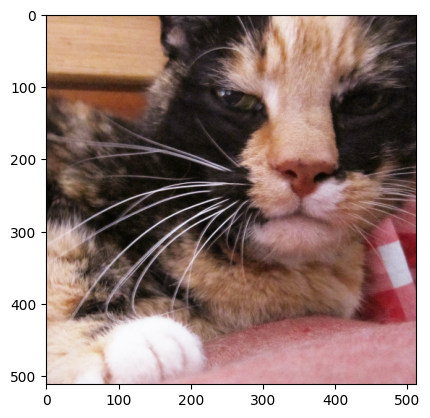

In [ ]:
# Se lee la imagen con la libreria imageio

img_1 = imageio.imread('imageio:wikkie.png')
plt.imshow(img_1)

# Otras imágenes (extraído de la documentación de imageio)

# bricks.jpg: A (repeatable) texture of stone bricks
# wood.jpg: A (repeatable) texture of wooden planks
# astronaut.png: Image of the astronaut Eileen Collins
# camera.png: A grayscale image of a photographer
# checkerboard.png: Black and white image of a chekerboard
# chelsea.png: Image of Stefan’s cat
# clock.png: Photo of a clock with motion blur (Stefan van der Walt)
# coffee.png: Image of a cup of coffee (Rachel Michetti)
# coins.png: Image showing greek coins from Pompeii
# horse.png: Image showing the silhouette of a horse (Andreas Preuss)
# hubble_deep_field.png: Photograph taken by Hubble telescope (NASA)
# immunohistochemistry.png: Immunohistochemical (IHC) staining
# moon.png: Image showing a portion of the surface of the moon
# page.png: A scanned page of text
# text.png: A photograph of handdrawn text
# wikkie.png: Image of Almar’s cat

In [ ]:
# Para ver el tipo de imagen
print(type(img_1))

<class 'numpy.ndarray'>


In [ ]:
# Para ver como array la imagen
print(img_1)

[[[210 165 132]
  [212 169 135]
  [210 165 129]
  ...
  [ 25  21  19]
  [ 28  24  21]
  [ 31  26  23]]

 [[213 170 137]
  [203 158 123]
  [208 163 126]
  ...
  [ 23  19  19]
  [ 21  18  18]
  [ 30  25  25]]

 [[214 170 139]
  [210 164 132]
  [215 171 142]
  ...
  [ 33  27  27]
  [ 23  20  20]
  [ 32  26  26]]

 ...

 [[219 193 189]
  [220 195 191]
  [222 198 195]
  ...
  [199 137 145]
  [200 138 150]
  [202 140 150]]

 [[210 183 178]
  [219 195 189]
  [216 191 189]
  ...
  [201 140 146]
  [205 145 151]
  [203 142 149]]

 [[211 185 180]
  [214 189 184]
  [216 191 188]
  ...
  [204 142 157]
  [201 139 152]
  [200 137 150]]]


### Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

/tmp/ipykernel_38/3180850623.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_ = imageio.imread('imageio:immunohistochemistry.png') / 255


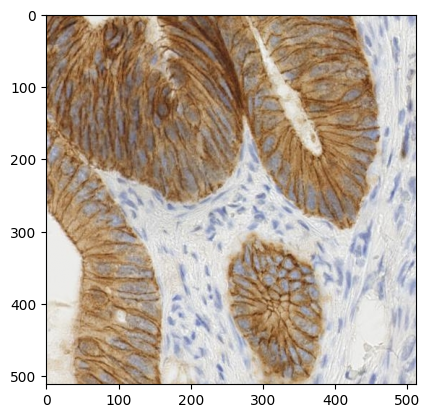

In [ ]:
img_ = imageio.imread('imageio:immunohistochemistry.png') / 255
plt.imshow(img_)

In [ ]:
# Pruebo esto para ver los canales RGB

# Separar los canales R, G y B
# En este caso funciona y no da error porque la imagen que cargue tiene los colores de rojo, verde y azul
# No esta solicitado, pero me intereso ver como se hacia
red = img_[:, :, 0]
green = img_[:, :, 1]
blue = img_[:, :, 2]

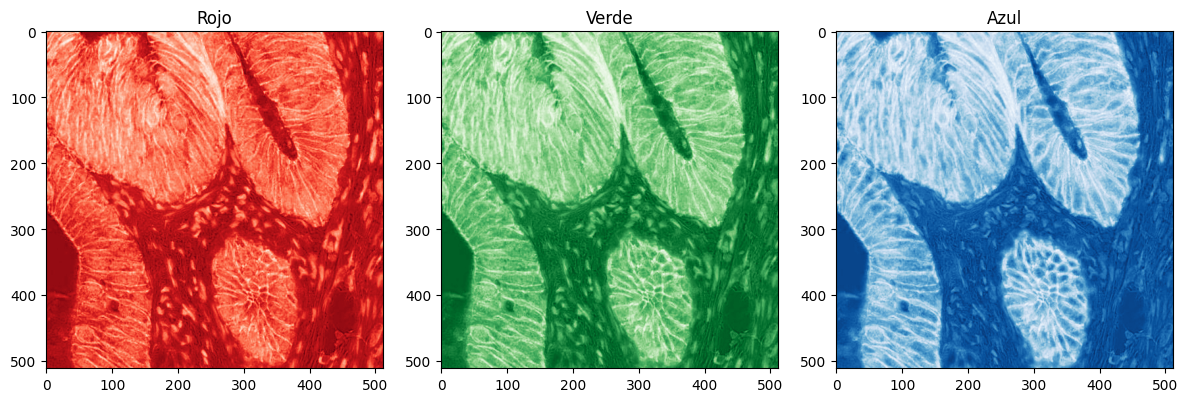

In [ ]:
# Imprimir la imagen en canales
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(red, cmap='Reds')
plt.title('Rojo')

plt.subplot(132)
plt.imshow(green, cmap='Greens')
plt.title('Verde')

plt.subplot(133)
plt.imshow(blue, cmap='Blues')
plt.title('Azul')

plt.tight_layout()
plt.show()

In [ ]:
print("Para pasar de RGB a YIQ, utilizo los valores de la matriz extraidos de Wikipedia")

Para pasar de RGB a YIQ, utilizo los valores de la matriz extraidos de Wikipedia


<img src="rgb-yiq.png">

**Fuente:** Wikipedia -> https://es.wikipedia.org/wiki/YIQ"

In [ ]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul( img.reshape((-1,3)), M.T ).reshape(img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen transformada de RGB a YIQ')

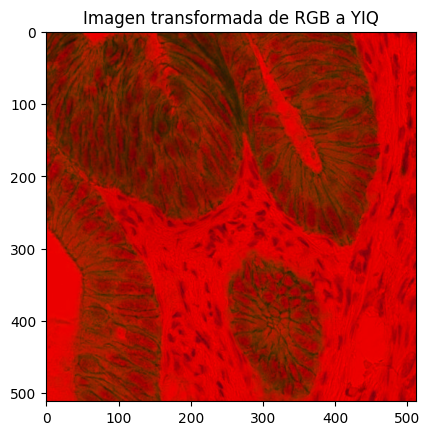

In [ ]:
img_YIQ = apply_matrix(img_, MAT_RGB2YIQ)

plt.imshow(img_YIQ)
plt.title("Imagen transformada de RGB a YIQ")

In [ ]:
print(img_YIQ[:,:,0])

[[0.49076078 0.51821176 0.48615686 ... 0.63416471 0.6935451  0.77338431]
 [0.43788235 0.44964706 0.43097647 ... 0.68122353 0.68570196 0.71803529]
 [0.38472549 0.41217647 0.4306549  ... 0.71400392 0.6753451  0.67400392]
 ...
 [0.85439608 0.87400392 0.90537647 ... 0.82683529 0.82687843 0.83864314]
 [0.83960392 0.85921176 0.89058431 ... 0.83557255 0.81511373 0.82805098]
 [0.85921176 0.85921176 0.8670549  ... 0.81988627 0.80844314 0.82805098]]


In [ ]:
# Aumento Y que la iluminación

# Cómo dice el instructivo da los ejemplos para alfa en 1.2 (Menor luminosidad) y 1.5 (Mayor luminosidad)
alfa = 1.2

aux = img_YIQ[:, :, 0]

if np.all(img_YIQ[:, :, 0] <= 1):
    print("\n\nSe puede cambiar la luminosidad")

# Aqui verifico que no se vaya de rango para poder incrementar la luminosidad
if np.all(img_YIQ[:, :, 0] <= 1):
    img_YIQ[:,:,0] *= alfa

# Nuevo valor de la imagen con iluminación
print("\n Verificamos la matriz de luminosidad: \n", img_YIQ[:,:,0])

# Para verificar si algunos valores de luminosidad son mayores que 1
if np.any(img_YIQ[:, :, 0] > 1):
    print("\n\nLa luminosidad se ha cambiado pero algunos valores superan el rango de valor 1")



Se puede cambiar la luminosidad

 Verificamos la matriz de luminosidad: 
 [[0.58891294 0.62185412 0.58338824 ... 0.76099765 0.83225412 0.92806118]
 [0.52545882 0.53957647 0.51717176 ... 0.81746824 0.82284235 0.86164235]
 [0.46167059 0.49461176 0.51678588 ... 0.85680471 0.81041412 0.80880471]
 ...
 [1.02527529 1.04880471 1.08645176 ... 0.99220235 0.99225412 1.00637176]
 [1.00752471 1.03105412 1.06870118 ... 1.00268706 0.97813647 0.99366118]
 [1.03105412 1.03105412 1.04046588 ... 0.98386353 0.97013176 0.99366118]]


La luminosidad se ha cambiado pero algunos valores superan el rango de valor 1


In [ ]:
# Para cambiar la saturación

# Coeficiente de saturación, si es menor a 1 baja la saturación, y viceversa

beta = 0.5

# Para cambiar I (valor 1) o Q (valor 2)
cambiarValor = 2

auxI = img_YIQ[:, :, 1]
auxQ = img_YIQ[:, :, 2]

if(cambiarValor == 1):
    if (np.all(img_YIQ[:, :, 1] >= -0.5957) or np.all(img_YIQ[:, :, 1] <= 0.5957)):
        print("Se puede editar la saturación")
        img_YIQ[:, :, 1] *= beta

        print("\n Verificamos la matriz de saturación I: \n", img_YIQ[:, :, 1])

        if (np.any(img_YIQ[:, :, 1] >= -0.5957) or np.any(img_YIQ[:, :, 1] <= 0.5957)):
            print("\n\nLa saturación I se ha cambiado pero algunos valores superan los rangos de valor (-0.5957 y 0.5957)")


if(cambiarValor == 2):
    if (np.all(img_YIQ[:, :, 2] >= -0.5226) or np.all(img_YIQ[:, :, 2] <= 0.5226)):
        print("Se puede editar la saturación")
        img_YIQ[:, :, 2] *= beta

        print("\n Verificamos la matriz de saturación I: \n", img_YIQ[:, :, 2])

        if (np.any(img_YIQ[:, :, 2] >= -0.5226) or np.any(img_YIQ[:, :, 2] <= 0.5226)):
            print("\n\nLa saturación Q se ha cambiado pero algunos valores superan los rangos de valor (-0.5957 y 0.5957)")


Se puede editar la saturación

 Verificamos la matriz de saturación I: 
 [[-0.00707255 -0.00708627 -0.00502157 ...  0.01832941  0.01668824
   0.01440392]
 [-0.00726471 -0.00727059 -0.00418824 ...  0.01830588  0.01669216
   0.01382157]
 [-0.00665098 -0.00666471 -0.00523529 ...  0.0160451   0.01445294
   0.01262353]
 ...
 [-0.00467451 -0.00468431 -0.0047     ... -0.00243922 -0.00058627
  -0.00059216]
 [-0.00344706 -0.00345686 -0.00347255 ... -0.00122353 -0.00058039
  -0.00017255]
 [-0.00345686 -0.00345686 -0.00346078 ... -0.00121569 -0.00016275
  -0.00017255]]


La saturación Q se ha cambiado pero algunos valores superan los rangos de valor (-0.5957 y 0.5957)


In [ ]:
# Para ver los rangos de la matriz
print("Tamaño maximo: ", img_YIQ.min())
print("Tamaño minimo", img_YIQ.max())

Tamaño maximo:  -0.04351568627450981
Tamaño minimo 1.1999999999999997


In [ ]:
# Si hay valores que se van de rango, con esto lo seteamos
img_YIQ = np.clip(img_YIQ, 0, 1)

In [ ]:
# Para volver ver los rangos de la matriz
print("Tamaño maximo: ", img_YIQ.min())
print("Tamaño minimo", img_YIQ.max())

Tamaño maximo:  0.0
Tamaño minimo 1.0


Text(0.5, 1.0, 'Imagen transformada de RGB a YIQ')

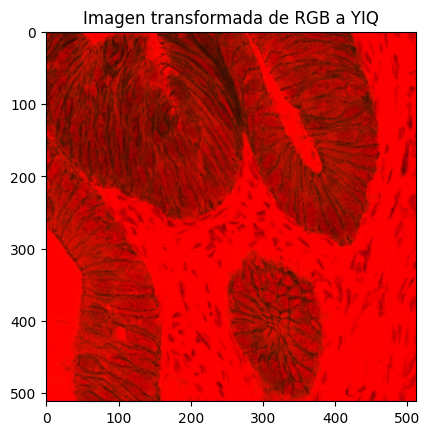

In [ ]:
plt.imshow(img_YIQ)
plt.title("Imagen transformada de RGB a YIQ")

In [ ]:
print("Para hacer la inversa, es decir pasar de YIQ a RGB, utilizo los valores de la matriz extraidos de Wikipedia")

Para hacer la inversa, es decir pasar de YIQ a RGB, utilizo los valores de la matriz extraidos de Wikipedia


<img src="yiq-rgb.png">

In [ ]:
MAT_YIQ2RGB = np.array([[1, 0.9563, 0.6210],
                        [1, -0.2721, -0.6474],
                        [1, -1.1070, 1.7046]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


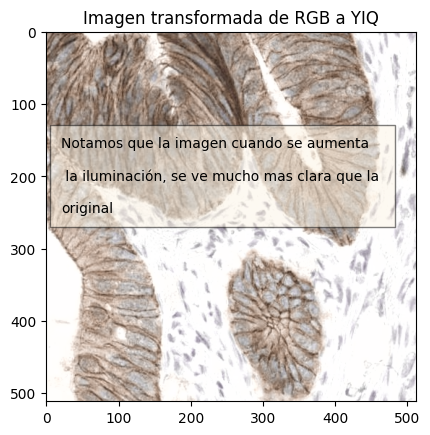

In [ ]:
img_new_RGB = apply_matrix(img_YIQ, MAT_YIQ2RGB) # Despues vi en la clase 4 que se puede aplicar la inversa directamente con una función de la libreria Numpy, en vez de haber escrito la matriz de arriba, pero ya lo hice de esta forma

plt.imshow(img_new_RGB)
plt.title("Imagen transformada de RGB a YIQ")

plt.text(20, 250, 'Notamos que la imagen cuando se aumenta \n\n la iluminación, se ve mucho mas clara que la \n\noriginal', bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'pad': 8})
plt.show()


### Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos. Los controles para elegir los filtros los organizan como les resulte más cómodo.

In [ ]:
print("La importación de las librerias ya esta hecha al principio de esta Notebook")

La importación de las librerias ya esta hecha al principio de esta Notebook


In [ ]:
img_rgb = iio.imread('imageio:bricks.jpg') / 255

[0.69019608 0.6745098  0.63921569]
(512, 512, 3)
float64


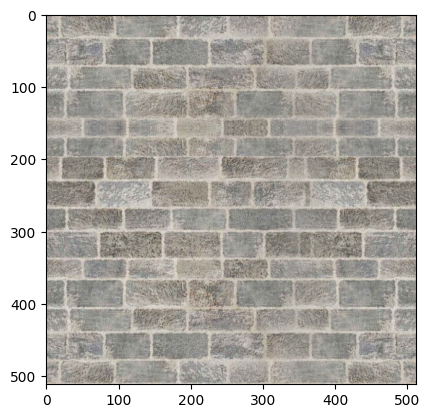

In [ ]:
plt.imshow(img_rgb)

# Accedemos a un pixel para ver el valor
print(img_rgb[100, 100])

print(img_rgb.shape)
print(img_rgb.dtype)

In [ ]:
print("Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1")

Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1


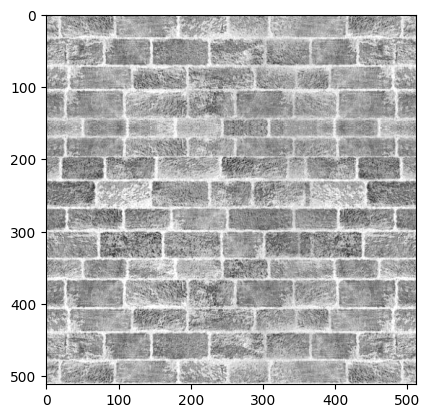

In [ ]:
new_image_YIQ = apply_matrix(img_rgb, MAT_RGB2YIQ)

canal_Y = new_image_YIQ[:,:,0]

canal_Y_2 = np.clip(canal_Y * 1.2, 0 , 1)
plt.imshow(canal_Y_2, 'gray', )

In [ ]:
canal_Y.flatten().shape

(262144,)

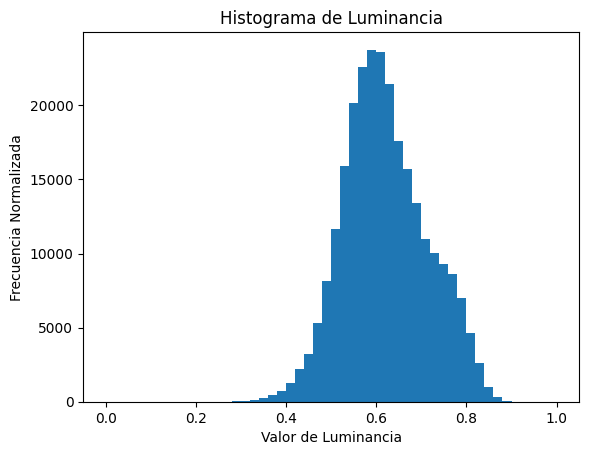

In [ ]:
histogram = plt.hist(canal_Y.flatten(), bins=50, range=(0,1))

plt.title('Histograma de Luminancia')
plt.xlabel('Valor de Luminancia')
plt.ylabel('Frecuencia Normalizada')

plt.show()

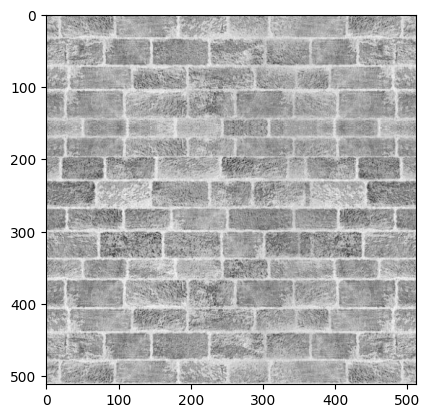

In [ ]:
# plt.imshow(canal_Y, 'gray')
canal_Y_raiz = np.sqrt(canal_Y)
plt.imshow(canal_Y_raiz, 'gray')

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 7.0000e+00,
        1.1000e+01, 2.1000e+01, 6.5000e+01, 1.3100e+02, 2.7500e+02,
        5.9300e+02, 1.0930e+03, 2.2880e+03, 4.2260e+03, 8.4740e+03,
        1.6028e+04, 2.3655e+04, 3.3485e+04, 3.6192e+04, 3.4385e+04,
        2.7482e+04, 2.2188e+04, 1.7936e+04, 1.6077e+04, 1.1505e+04,
        5.0070e+03, 9.5800e+02, 5.9000e+01, 0.0000e+00, 0.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

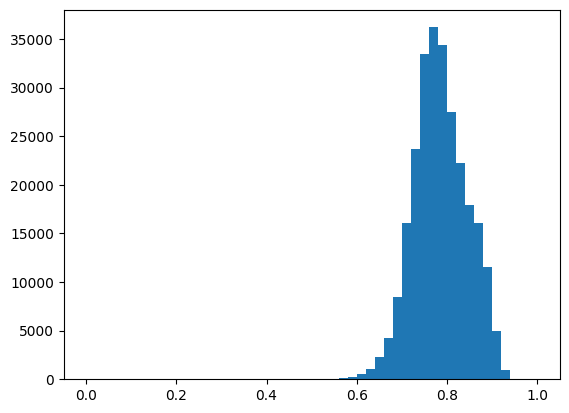

In [ ]:
plt.hist(canal_Y_raiz.flatten(), bins=50, range=(0,1))

### Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

In [ ]:
img_rgb = iio.imread('imageio:coffee.png') / 255

In [ ]:
print("Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1")

Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1


In [ ]:
img_YIQ = apply_matrix(img_rgb, MAT_RGB2YIQ)

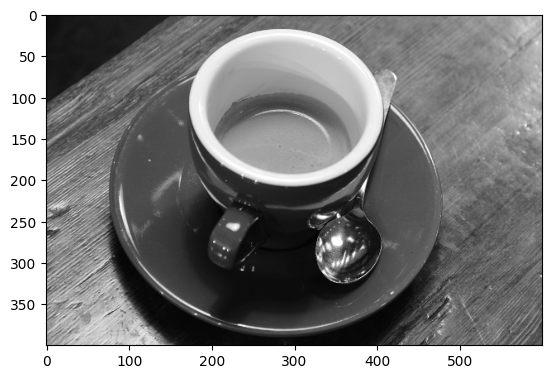

In [ ]:
# Canal Y es de Iluminación
canal_Y = img_YIQ[:,:,0]
canal_I = img_YIQ[:,:,1]
canal_Q = img_YIQ[:,:,2]

plt.imshow(canal_Y, 'gray')

### Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat
Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

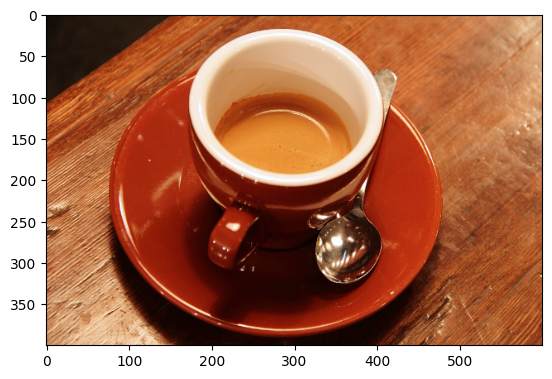

In [ ]:
img_rgb = iio.imread('imageio:coffee.png') / 255

plt.imshow(img_rgb)

In [ ]:
print("Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1")

Para hacer la función de abajo de cambiar de RGB a YIQ, utilizo directamente la matriz y el metodo del ejercicio 1.1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


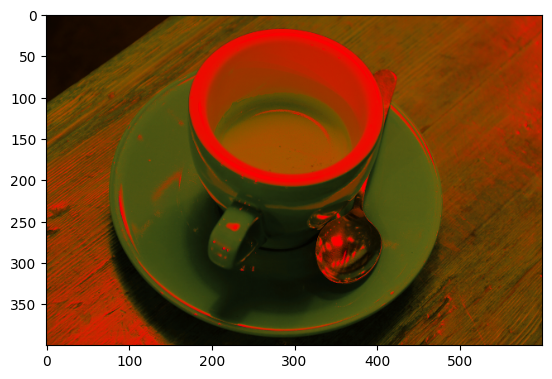

In [ ]:
img_YIQ = apply_matrix(img_rgb, MAT_RGB2YIQ)

plt.imshow(img_YIQ)

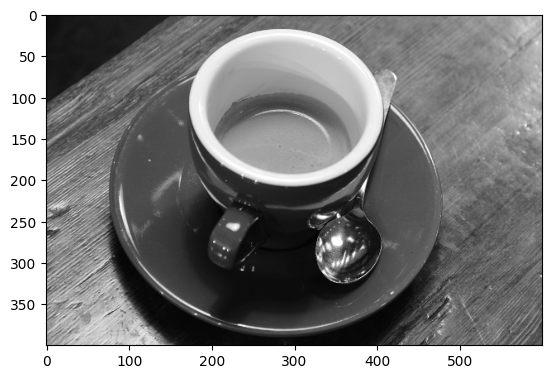

In [ ]:
# Canal Y es de Iluminación
canal_Y = img_YIQ[:,:,0]

plt.imshow(canal_Y, 'gray')

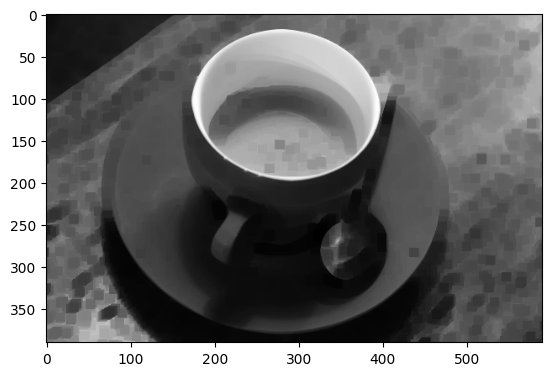

In [ ]:
def erosion(imagen):
    filas,columnas=imagen.shape
    output=np.empty((filas,columnas))
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[i-1:i+2,j-1:j+2] #Ojo cuando vean el video de la clase que en vivo puse i+1 y j+1 y quedó 2x2 el entorno
            minimo = np.min(entorno.flatten())
            output[i,j]=minimo
    output=output[1:filas-1,1:columnas-1]
    return(output)

def dilatacion(imagen):
    filas,columnas=imagen.shape
    output=np.empty((filas,columnas))
    for i in range(1,filas-1):
        for j in range(1,columnas-1):
            entorno = imagen[i-1:i+2,j-1:j+2] #Ojo cuando vean el video de la clase que en vivo había puesto i+1 y j+1 y quedó 2x2 el entorno
            maximo = np.max(entorno.flatten())
            output[i,j]=maximo
    output=output[1:filas-1,1:columnas-1]
    return(output)


plt.imshow(erosion(canal_Y),"gray")

foto=canal_Y
for i in range(5):
    foto=erosion(foto)

plt.imshow(foto,"gray")

foto=canal_Y
for i in range(5):
    foto=erosion(foto)


### Ejercicios Optativos. Ver presentación para más detalle

Recordá que hay ejercicios opcionales especificados en la presentación correspondiente al trabajo práctico.


#### Ejercicio 1.4 (optativo)

Implementar un aplicativo que ejecute las operaciones vistas en este tema.

Se muestra la interfaz gráfica de un ejemplo en particular.

<img src="Optativo1-4.png" width="750px" height="400px">

#### Resolución de la actividad

In [ ]:
print("La importación de las librerias ya esta hecha al principio de esta Notebook")

La importación de las librerias ya esta hecha al principio de esta Notebook


In [ ]:
# Abrimos las 2 imagenes
imagen1 = iio.imread('imageio:moon.png') / 255
imagen2 = iio.imread('imageio:camera.png') / 255

In [ ]:
# Visualizamos las dimensiones de ambas imagenes
print("La dimensión de la primer imagen es: ", imagen1.shape)
print("La dimensión de la segunda imagen es: ", imagen2.shape)

La dimensión de la primer imagen es:  (512, 512)
La dimensión de la segunda imagen es:  (512, 512)


In [ ]:
print("Siendo que las imagenes elegidas son del mismo tamaño, no hace falta redimensionar, por ende se suman sin inconvenientes")

Siendo que las imagenes elegidas son del mismo tamaño, no hace falta redimensionar, por ende se suman sin inconvenientes


In [ ]:
# Sumo sin aplicar el redimensionamiento, por ejemplo: imagen2 = imagen2[0:255, 100:500, :]
imagen3 = imagen1 + imagen2

In [ ]:
print("Datos de las suma de las imagenes")
print(imagen3.dtype)
print(imagen3.min())
print(imagen3.max())

Datos de las suma de las imagenes
float64
0.07058823529411765
1.8196078431372549


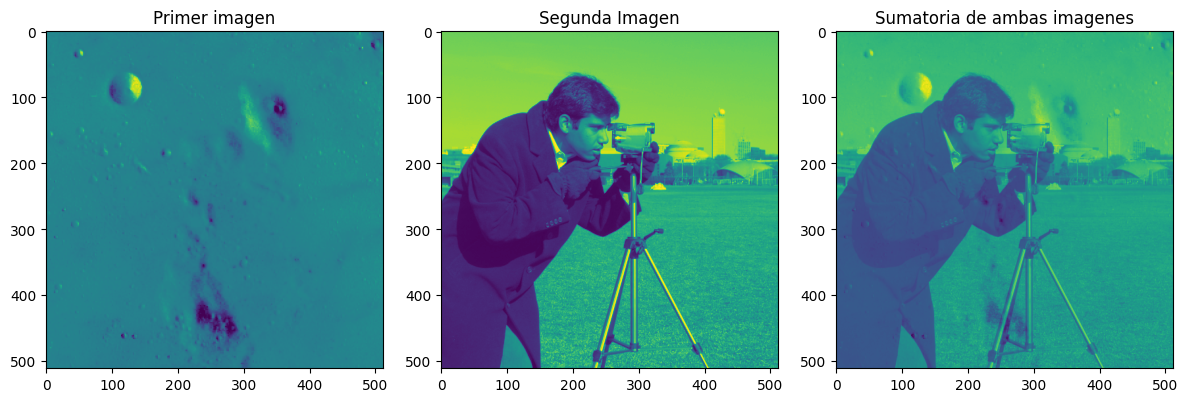

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(imagen1)
plt.title('Primer imagen')

plt.subplot(132)
plt.imshow(imagen2)
plt.title('Segunda Imagen')

plt.subplot(133)
plt.imshow(imagen3)
plt.title('Sumatoria de ambas imagenes')

plt.tight_layout()
plt.show()

#### Ejercicio 2.3 (optativo)

Desarrollar un aplicativo o notebook que implemente las siguientes funciones:

* Downsampling X2 (mostrando la imagen resultado al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
* Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
* Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.

#### Resolución de la actividad

In [ ]:
print("La importación de las librerias ya esta hecha al principio de esta Notebook")

La importación de las librerias ya esta hecha al principio de esta Notebook


In [ ]:
image_new_excercise_optative_2_3 = imageio.imread('imageio:hubble_deep_field.png')

/tmp/ipykernel_38/1616117787.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_new_excercise_optative_2_3 = imageio.imread('imageio:hubble_deep_field.png')


In [ ]:
# Función para realizar upsampling con un kernel constante
def upsample_constant(image):
    h, w = image.shape[:2]
    upsampled = np.zeros((h * 2, w * 2, image.shape[2]), dtype=image.dtype)
    upsampled[::2, ::2] = image
    return upsampled

In [ ]:
# Función para realizar downsampling con un kernel constante
def downsample_constant(image_d):
    return image_d[::2, ::2]

In [ ]:
# Aplicar downsampling y upsampling con un kernel constante
upsampled_image = upsample_constant(image_new_excercise_optative_2_3)

In [ ]:
# Aplicar y muestra downsampling
downsampled_image = downsample_constant(image_new_excercise_optative_2_3)

In [ ]:
# Niveles de gris deseados (por ejemplo, 4 niveles)
num_levels = 4

# Cuantización uniforme
quantized_image = (image_new_excercise_optative_2_3 * (num_levels - 1) / 255).round() * (255 / (num_levels - 1))
quantized_image = quantized_image.astype(np.uint8)

In [ ]:
print("Si bien, el punto me solicita que lo muestre al tamaño grande para ver los resultados, abajo los muestro en tamaño pequeño pero igual estan los ejes marcados")

Si bien, el punto me solicita que lo muestre al tamaño grande para ver los resultados, abajo los muestro en tamaño pequeño pero igual estan los ejes marcados


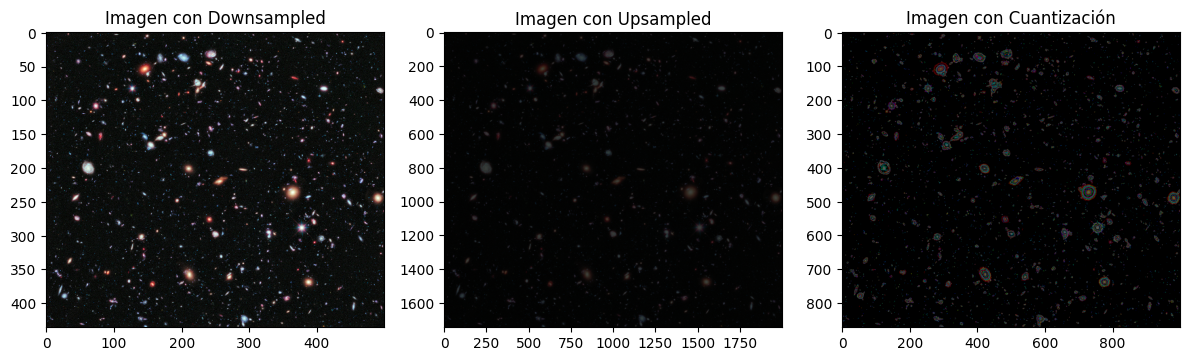

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(downsampled_image)
plt.title('Imagen con Downsampled')

plt.subplot(132)
plt.imshow(upsampled_image)
plt.title('Imagen con Upsampled')

plt.subplot(133)
plt.imshow(quantized_image)
plt.title('Imagen con Cuantización')

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=abbf0b20-ab07-4134-ab74-0cee9e2ed30a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>